<a href="https://colab.research.google.com/github/KUNALKEDARI20/KNN/blob/main/Assignment_no_13_KNN_Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prepare a model for glass classification using KNN**

***Data Description:***

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps







In [81]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [119]:
# Import Dataset
df=pd.read_csv('/content/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


EDA

In [22]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [26]:
#Creating a copy of orginial dataset
df1=df.copy()

In [27]:
# Dictionary mapping class labels to names
class_names = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}

# Replace numerical class labels with names
df1['Type'] = df1['Type'].map(class_names)


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  \
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   

                               Type  
0  building_windows_float_processed  
1  building_windows_float_processed  
2  building_windows_float_processed  
3  building_windows_float_processed  
4  building_windows_float_processed  


In [28]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


In [29]:
df1.info() # 0 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


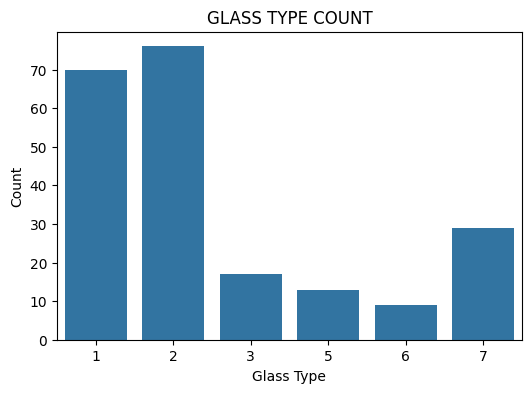

In [40]:
#Bar Plot-to visualize the distribution of Glass types
plt.figure(figsize=(6,4))
sns.countplot(x='Type',data=df)
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.title('GLASS TYPE COUNT')
plt.show()
#1: 'building_windows_float_processed',
#2: 'building_windows_non_float_processed'3: 'vehicle_windows_float_processed',
#4: 'vehicle_windows_non_float_processed',5: 'containers',
#6: 'tableware',7: 'headlamps'



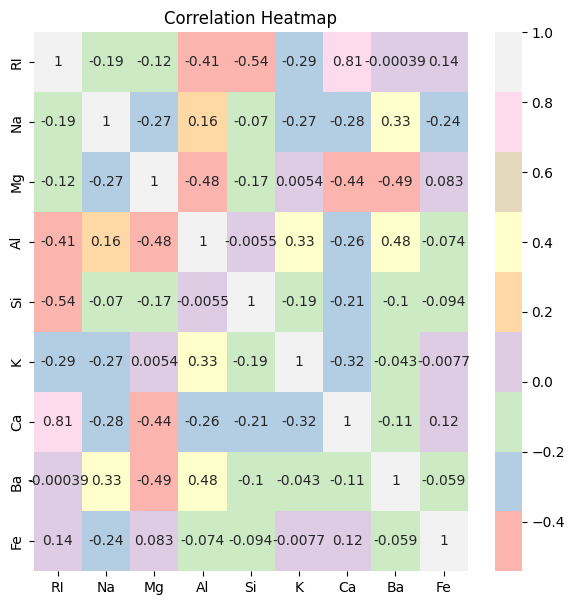

In [46]:
#Correlation-to visualize the relationship between different features
plt.figure(figsize=(7,7))
sns.heatmap(df1.corr(),annot=True,cmap='Pastel1')
plt.title('Correlation Heatmap')
plt.show()


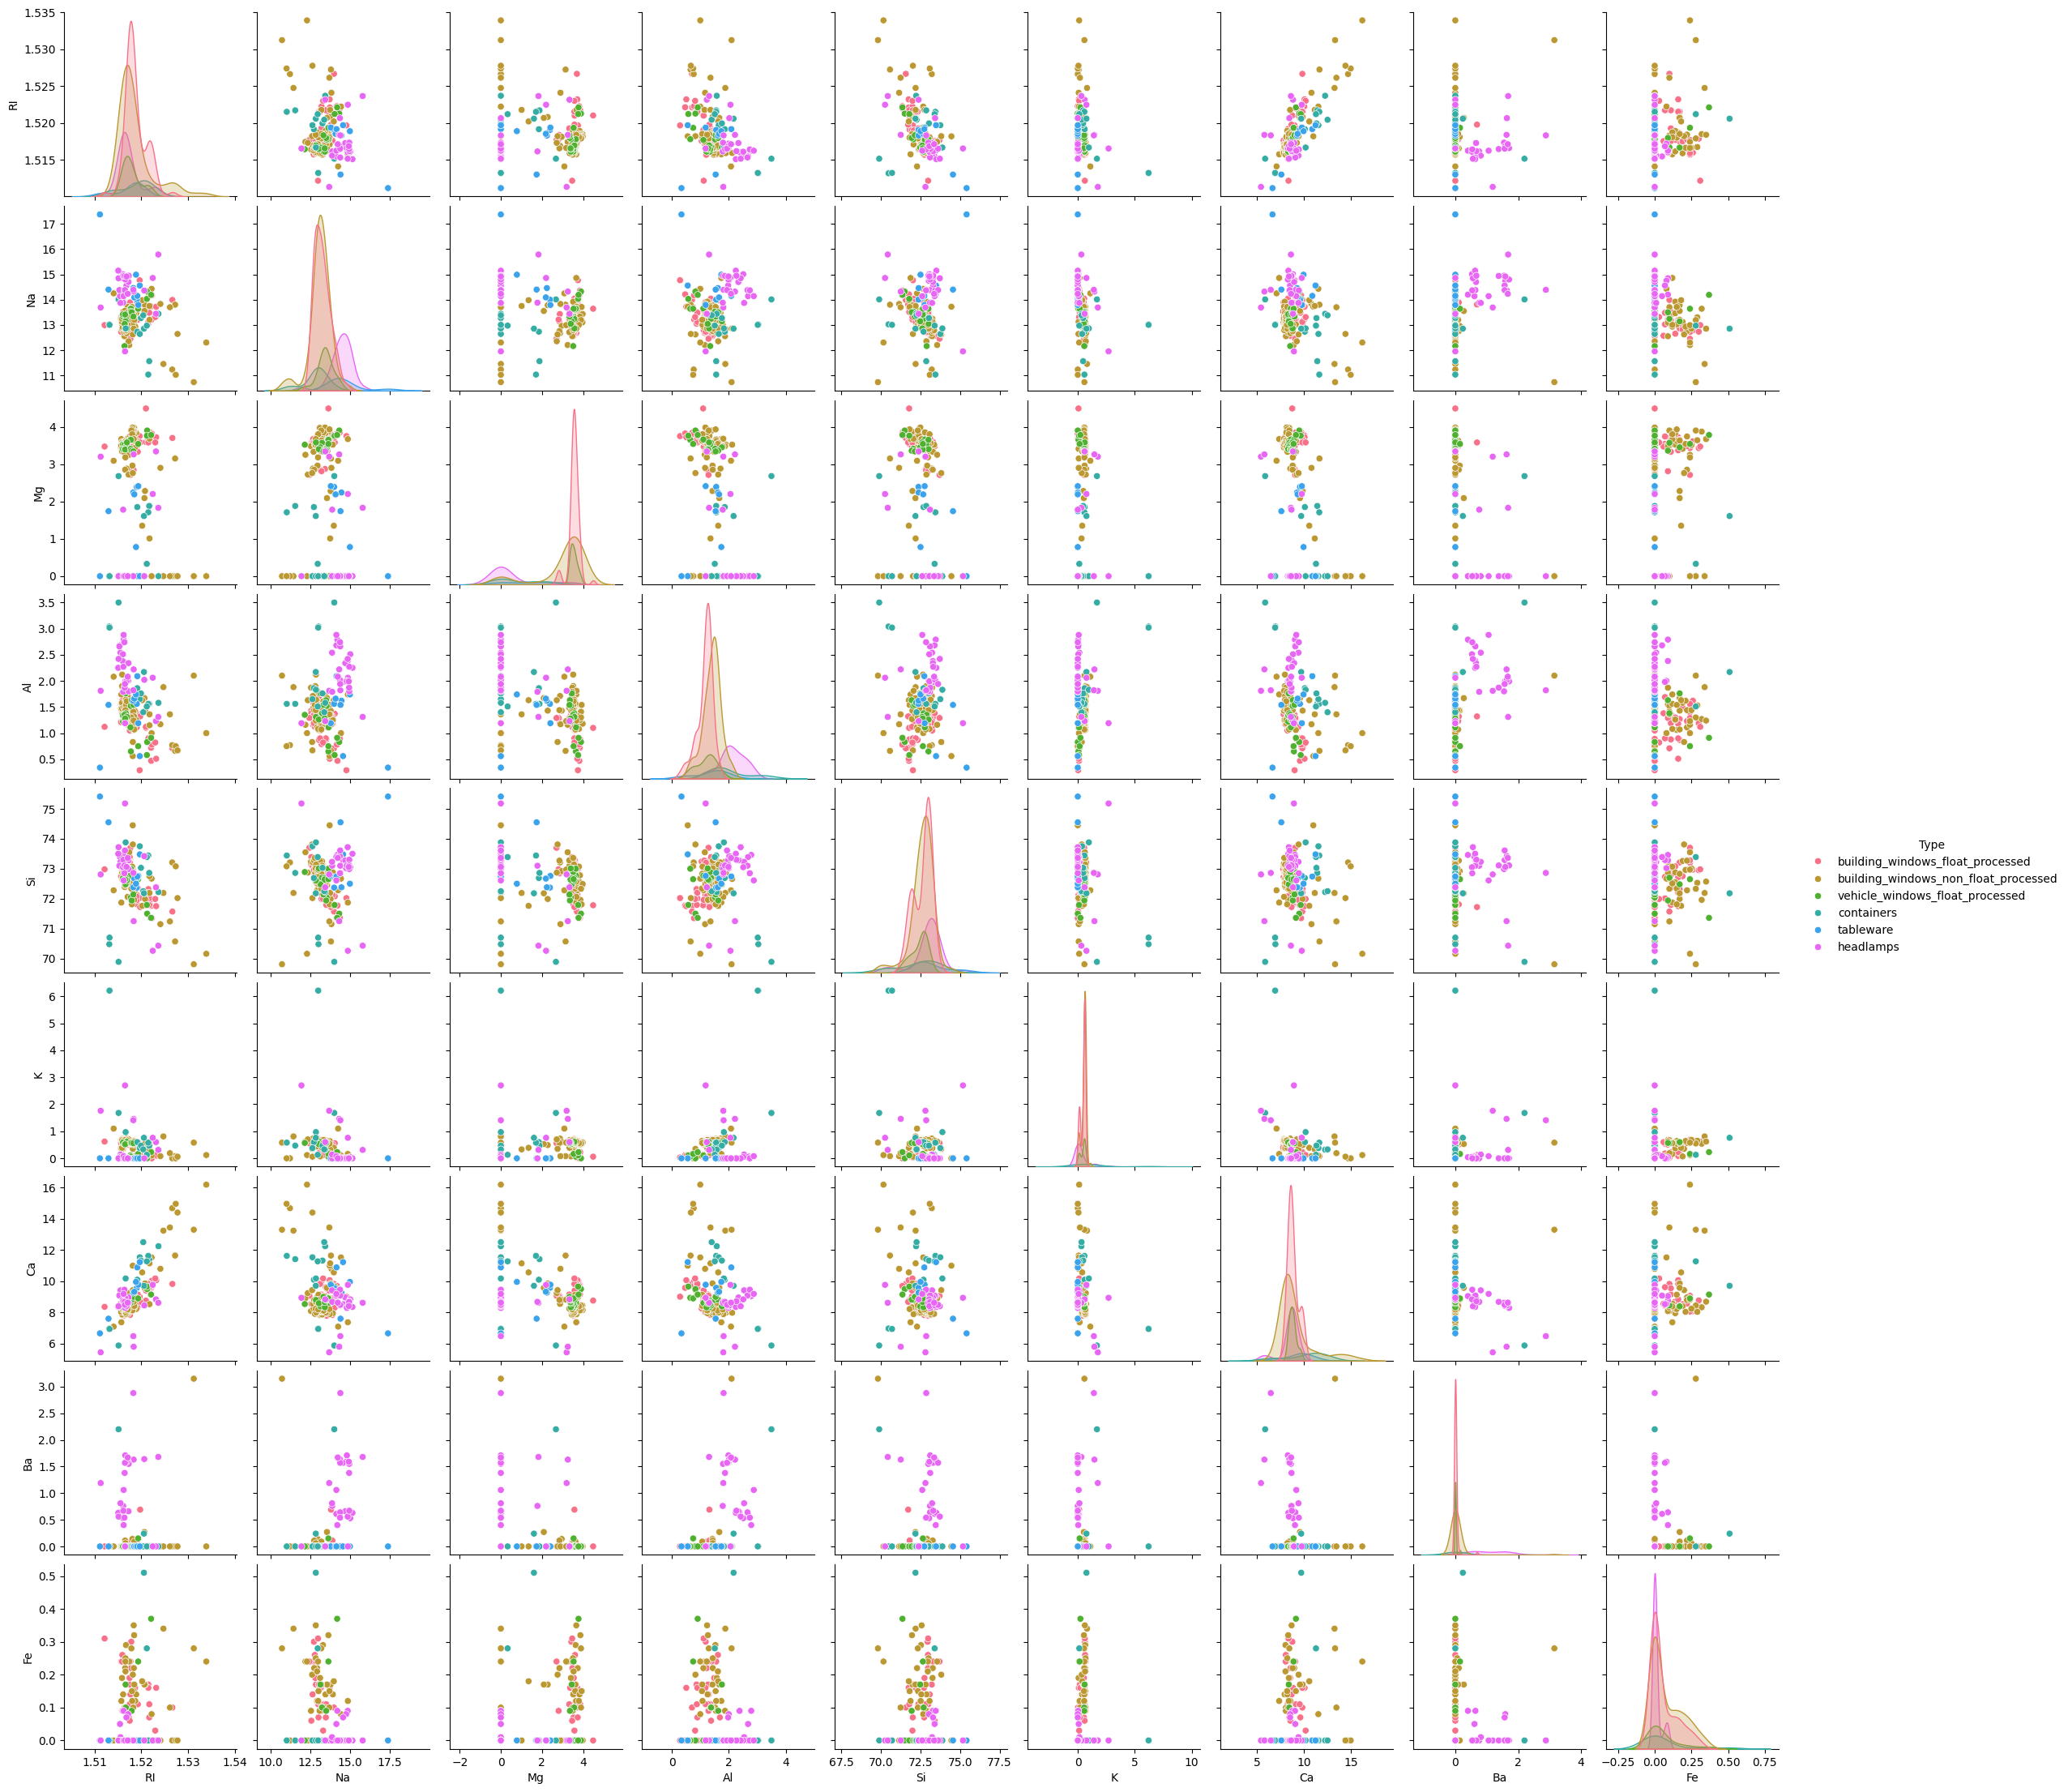

In [85]:
# Pairplot-to visualize pairwise relationship between features
sns.pairplot(df1, hue='Type', palette='husl')
plt.show()

In [166]:
# Spliting the data into X and Y
X=df.drop('Type',axis=1)
Y=df1['Type']

In [165]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with the desired number of components
pca = PCA(n_components=2)  # You can choose the number of components based on your requirements

# Fit PCA on the scaled features and transform the data
X_pca = pca.fit_transform(X_scaled)


In [157]:
# Min-Max Scaling on only numerical features
#scaled=MinMaxScaler()
#X_scaled=scaled.fit_transform(X)
#X_scaled=pd.DataFrame(X_scaled)
#X_scaled.head()

In [167]:
#Divding the data into train and test sets

xtrain,xtest,ytrain,ytest=train_test_split(X_pca,Y,test_size=0.33,random_state=42)


In [168]:
print('xtrain=',xtrain.shape)
print('xtest=',xtest.shape)
print('---------------------')
print('ytrain=',ytrain.shape[0])
print('ytest=',ytest.shape[0])

xtrain= (143, 2)
xtest= (71, 2)
---------------------
ytrain= 143
ytest= 71


In [177]:
# Train the KNN algorithm

knn=KNeighborsClassifier(n_neighbors=5)  # Initialize KNN classifier
knn.fit(xtrain,ytrain)                   #Training the classifier on training data
y_pred=knn.predict(xtest)                #make predictions on the test set

#Accuracy
accuracy=accuracy_score(ytest,y_pred)
print('Accuracy=',accuracy)

Accuracy= 0.6901408450704225


In [170]:
classificationreport=classification_report(ytest,y_pred)
print('Classification report=','\n',classificationreport)

Classification report= 
                                       precision    recall  f1-score   support

    building_windows_float_processed       0.67      1.00      0.80        22
building_windows_non_float_processed       0.78      0.56      0.65        25
                          containers       0.50      0.33      0.40         6
                           headlamps       0.83      1.00      0.91        10
                           tableware       0.25      0.25      0.25         4
     vehicle_windows_float_processed       0.00      0.00      0.00         4

                            accuracy                           0.69        71
                           macro avg       0.50      0.52      0.50        71
                        weighted avg       0.65      0.69      0.65        71



HYPERPARAMETER TUNNING TO FIND OPTIMAL NO.OF K-NEAREST NEIGHBOR

In [171]:
num_folds=10
kfold=KFold(n_splits=num_folds)

In [182]:
k_values=range(1,21)
k_score=[]

for k in  k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  score=cross_val_score(knn,X_pca,Y,cv=kfold,scoring='accuracy')
  k_score.append(score.mean()*100)

pd.Series(k_score).sort_values(ascending=False)

5     55.692641
7     54.805195
6     54.805195
9     54.350649
2     53.982684
8     53.874459
4     53.463203
10    53.419913
3     53.008658
1     52.943723
11    52.012987
15    50.519481
12    49.134199
13    49.112554
16    49.069264
14    48.679654
17    47.640693
0     47.619048
18    43.874459
19    41.969697
dtype: float64

Text(0, 0.5, 'K-score')

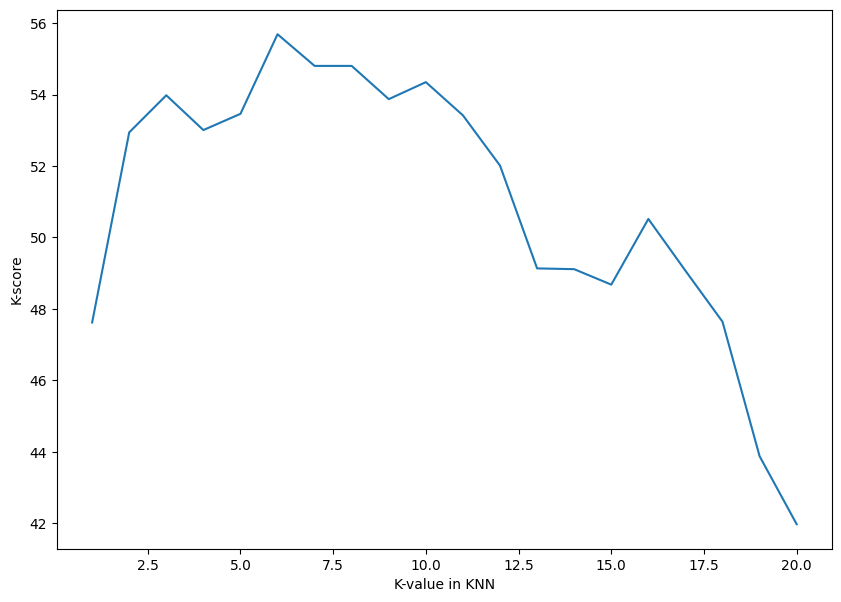

In [183]:
plt.figure(figsize=(10,7))
plt.plot(k_values,k_score)
plt.xlabel('K-value in KNN')
plt.ylabel('K-score') # fluctuations in the graph is due to PCA where some of the information is lose

K=5 applying the Algorithm

In [184]:
#K=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
y_pred_knn=knn.predict(xtest)

#Accuracy_score
Accuracy=accuracy_score(ytest,y_pred_knn)
Accuracy


0.6901408450704225